## Entrainez un KNN pour classifier des images 

### Description du jeu de données MNIST :


* Dataset très célèbreconstitué d'un ensemble de 70000 images 28x28 pixels en noir et blanc annotées du chiffre correspondant (entre 0 et 9). 

* L'objectif de ce jeu de données était de permettre à un ordinateur d'apprendre à reconnaître des nombres manuscrits automatiquement (pour lire des chèques par exemple). Ce dataset utilise des données réelles qui ont déjà été pré-traitées pour être plus facilement utilisables par un algorithme (Plusieurs techniques existent pour pré-traiter des images):
    * Egalisation d'histogramme
    * Filtrage, Détection de contours
    * Extraction de features avec SIFT,ORB ou CNN (Voir un cours de computer vision pour les détails)

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display 

In [2]:
from sklearn.datasets import fetch_openml

Notre objectif sera donc d'entraîner un modèle qui sera capable de reconnaître les chiffres écrits sur ce type d'images. Le dataset MNIST est déjà disponible dans sickit-learn.

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [68]:
#print(mnist.DESCR)

In [4]:
mnist.data.shape

(70000, 784)

**data** contient les images sous forme de tableaux de 28 x 28 = 784 couleurs de pixel en niveau de gris, c'est-à-dire que la couleur de chaque pixel est représentée par un nombre entre 0 et 16 qui représente si celle-ci est proche du noir ou pas (0 = blanc, 16 = noir). 



In [5]:
mnist.target.shape

(70000,)

**target** contient les annotations (de 1 à 9) correspondant à la valeur "lue" du chiffre.

<div class="alert-info">
On dit ici que le nombre de features (ou dimensions) en entrée est de 28 x 28 x 1 = 784. Dans le cas où l'on aurait utilisé des images couleur et pas en niveaux de gris, on serait passé à 3 composantes couleurs par pixel (rouge, vert, bleu) et donc le nombre de features aurait été : 28 x 28 x 3 = 2352.
</div>

### Echantillonage :


<div class="alert-warning">
Le dataset est relativement petit mais, pour le modèle k-NN, il est déjà trop gros pour obtenir rapidement des résultats. On va donc effectuer un sampling et travailler sur seulement 5000 données
</div>

In [6]:
sample = np.random.randint(0,70000,5000)

In [7]:
len(sample)

5000

In [8]:
print(sample)

[44269  6299 41863 ... 41064  8150 36131]


5000 integers ont été selectionnées aléatoirement 

In [9]:
data = mnist.data[sample,:]
target = mnist.target[sample]

In [10]:
data.shape

(5000, 784)

In [11]:
target.shape

(5000,)

<div class="alert-success">
Pour faire ce travail de manière rigoureuse, regardez la fonction  sklearn.utils.resample. (car la fonction randint peut prendre des doublons)

### Séparation en train_test :


Séparation par répartition classique 80/20 entre training et testing set.

In [12]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size = 0.8)

On utilise uniquement le training set pour entraîner notre modèle et on garde le testing set pour plus tard. 

### Entrainement :


<div class="alert-danger">
On test un KNN avec 3 voisins 
</div>

In [13]:
from sklearn import neighbors

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [15]:
error = 1-knn.score(xtest,ytest)
print("Erreur :{}".format(error))

Erreur :0.06899999999999995


<div class="alert-success">
La performance exacte de notre modèle dépend du jeu de sélection. N'hésitez pas à lancer plusieurs fois ce traitement en changeant les jeux de données d'apprentissage et de test pour vous en rendre compte.
</div>

### Optimisation du score sur les données de test

In [16]:
errors =[]

for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    knn.fit(xtrain,ytrain)
    errors.append(1-knn.score(xtest,ytest))
    



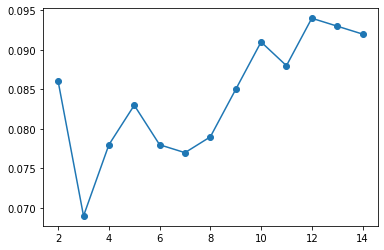

In [17]:
plt.plot(range(2,15),errors,'o-')   

<span style="color:red">
Le KNN qui classifie le mieux les données, et qui donc dans ce cas précis reconnaît au mieux les nombres écrits à la main est celui avec 7 voisins.
</span>

### Afficher les prédictions du meilleur classifieur sur quelques données :

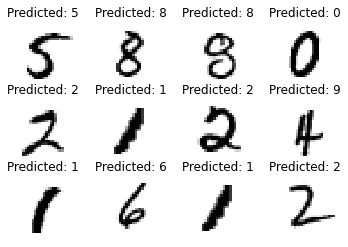

In [19]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(4)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

### Afficher les prédictions du meilleur classifieur sur quelques données :

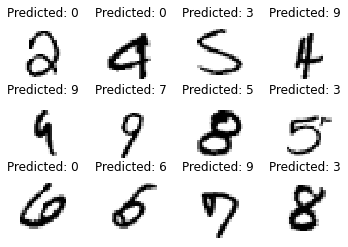

In [20]:
# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()


In [39]:
predicted

array(['7', '0', '8', '3', '0', '3', '0', '9', '7', '6', '8', '8', '9',
       '3', '0', '4', '7', '0', '0', '1', '3', '8', '3', '2', '4', '0',
       '9', '9', '2', '0', '4', '4', '7', '1', '2', '2', '0', '9', '8',
       '1', '3', '0', '3', '2', '9', '4', '0', '1', '0', '0', '7', '1',
       '3', '6', '1', '4', '4', '7', '5', '8', '6', '3', '5', '7', '8',
       '7', '8', '4', '3', '8', '6', '2', '3', '0', '5', '3', '7', '2',
       '8', '0', '1', '8', '4', '1', '6', '6', '6', '2', '7', '8', '6',
       '4', '0', '6', '4', '3', '1', '5', '8', '0', '5', '3', '7', '1',
       '0', '7', '7', '4', '8', '0', '9', '4', '6', '0', '9', '1', '1',
       '0', '9', '9', '9', '5', '6', '3', '7', '3', '8', '9', '9', '7',
       '5', '0', '4', '3', '2', '0', '0', '0', '9', '2', '2', '5', '7',
       '9', '5', '8', '4', '5', '7', '1', '2', '8', '9', '4', '0', '9',
       '2', '3', '1', '0', '6', '3', '3', '0', '2', '7', '1', '7', '5',
       '1', '3', '8', '5', '2', '0', '8', '1', '1', '5', '4', '8

In [30]:
predicted[5]

'3'

In [31]:
xtest[5,:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  6